## Apply Non LinearRegression to a subduction surface motions problem

## Goals:

    How to choose the best polyfit to describe the function behaviour and predict a trend
    
# Test different polyfit functions
![alt](../img/biasvariance.png) 
 

In [5]:
# Import Libraries
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import math
import matplotlib.pyplot as plt
import os
import matplotlib.lines as mlines
import itertools
import math
from scipy import stats
from scipy.stats import pearsonr  
from scipy.stats import spearmanr
from sklearn.metrics import r2_score
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_rob

In [ ]:
# Trench and Plate velocities obtained from 3D simulations
Vpmag        = np.array([2.5025651501496613,3.6241665283346278, 4.5125663357343422, 5.3561187289356731, 6.4611815337388379])
Vt           = np.array([-0.92865887,  -0.78003195, -0.15118985, 0.3911321 ,  0.99889706 ])
subpart      = Vt/ Vpmag 
Wstar        = np.array([0,0.25,0.5,0.75,1,])
x            = Wstar
y            = subpart 

# Linear Regression with Numpy Polyfit function

In [ ]:
#define function to calculate r-squared
def polyfit(x, y, degree):
    results = {}
    coeffs  = np.polyfit(x, y, degree)
    p       = np.poly1d(coeffs)
    
    #calculate r-squared
    yhat    = p(x)
    ybar    = np.sum(y)/len(y)
    ssreg   = np.sum((yhat-ybar)**2)
    sstot   = np.sum((y - ybar)**2)
    results['r_squared'] = ssreg / sstot

    return results

#E. g., for finding the r-squared of polynomial model with degree = 3, appy as below
#polyfit(xm, ym, 3)

{'r_squared': 0.977336215861069} of degree 1 function
Coefficients [0.53584844], intercept -0.34636274949898255
{'r_squared': 0.9968116426929176} of degree 2 function
Coefficients [-0.2557169   0.79156534], intercept -0.37832736251727384
{'r_squared': 0.9982186971720884} of degree 3 function
Coefficients [-0.27109042  0.15091872  0.64585424], intercept -0.3732444172022547
{'r_squared': 0.9999999999999949} of degree 4 function
Coefficients [ 1.61401142 -3.49911326  2.12520055  0.28558384], intercept -0.37108279476538764


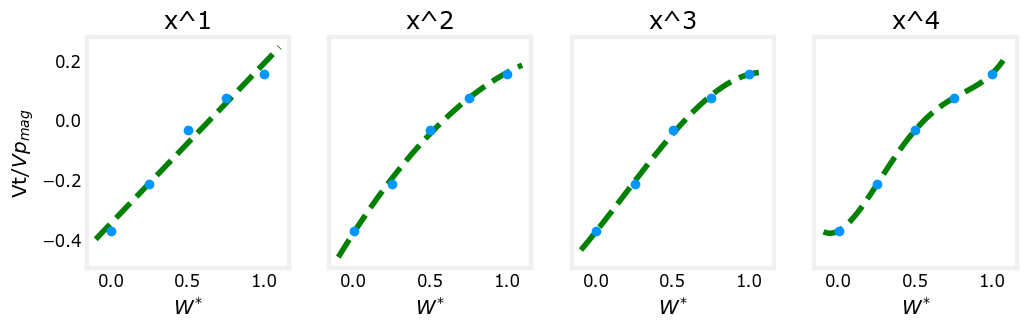

In [4]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
myline  =  np.arange(-0.1, 1.1, 0.01)
for i in range(len(ax)):    
    mymodel = np.poly1d(np.polyfit(x, y, i+1))
    ax[i].plot(myline, mymodel(myline), color="green" ,linestyle = 'dashed',)
    #ax[i].scatter(myline,mymodel(myline), color="green" ,linestyle = 'dashed',)
    #ax[i].set_xlabel(X_features[i])
    ax[i].set_title(f"x^{i+1}")
    ax[i].set_xlabel('$W^{*}$')
    ax[i].plot(x, y, 'o',)
    print (f"{polyfit(x, y, i+1)} of degree {i+1} function")
    pol = np.poly1d(mymodel )
    print(f"Coefficients {pol.coeffs[0:-1]}, intercept {pol.coeffs[-1]}")

#ax[0].set_ylabel("y")
# Set the y-axis label
ax[0].set_ylabel('Vt/$Vp_{mag}$')
# Set the x-axis label
plt.show()

Iteration         0, Cost: 1.47582e-02
Iteration      1000, Cost: 3.08149e-33
Iteration      2000, Cost: 3.08149e-33
Iteration      3000, Cost: 3.08149e-33
Iteration      4000, Cost: 3.08149e-33
Iteration      5000, Cost: 3.08149e-33
Iteration      6000, Cost: 3.08149e-33
Iteration      7000, Cost: 3.08149e-33
Iteration      8000, Cost: 3.08149e-33
Iteration      9000, Cost: 3.08149e-33
w,b found by gradient descent: w: [0.5], b: -0.3460


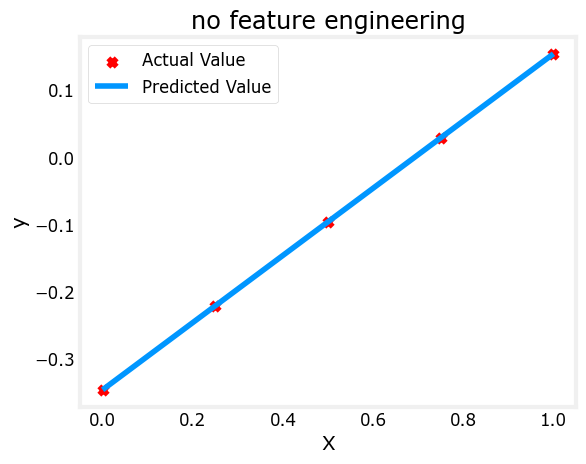

In [9]:
# create target data
#x = np.arange(0, 20, 1)
#x  =  np.arange(-0.1, 1.1, 0.01)
y =  -0.346+ x*0.5
X = x.reshape(-1, 1)

model_w,model_b = run_gradient_descent_rob(X,y,iterations=10000, alpha = 1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(x,X@model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

# An alternative view
Above polynomial features were chosen based on how well they matched the target data. Another way to think about this is to note that we are still using linear regression once we have created new features. Given that, the best features will be linear relative to the target. This is best understood with an example.

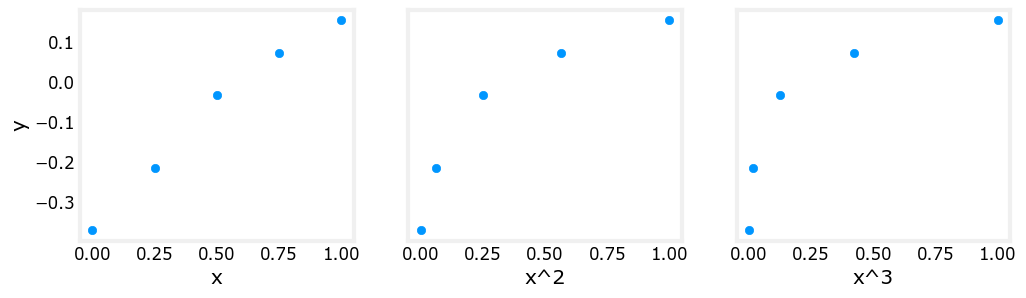

In [5]:
# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x^2','x^3']
fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

In [6]:
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

# add mean_normalization 
X = zscore_normalize_features(X)     
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw        X:[1. 1. 1.]
Peak to Peak range by column in Normalized X:[2.82842712 2.71225401 2.66204906]


Iteration         0, Cost: 1.30004e-02
Iteration     10000, Cost: 3.27529e-05
Iteration     20000, Cost: 3.27109e-05
Iteration     30000, Cost: 3.27084e-05
Iteration     40000, Cost: 3.27083e-05
Iteration     50000, Cost: 3.27083e-05
Iteration     60000, Cost: 3.27083e-05
Iteration     70000, Cost: 3.27083e-05
Iteration     80000, Cost: 3.27083e-05
Iteration     90000, Cost: 3.27083e-05
w,b found by gradient descent: w: [ 0.22834396  0.05564327 -0.10183523], b: -0.0784


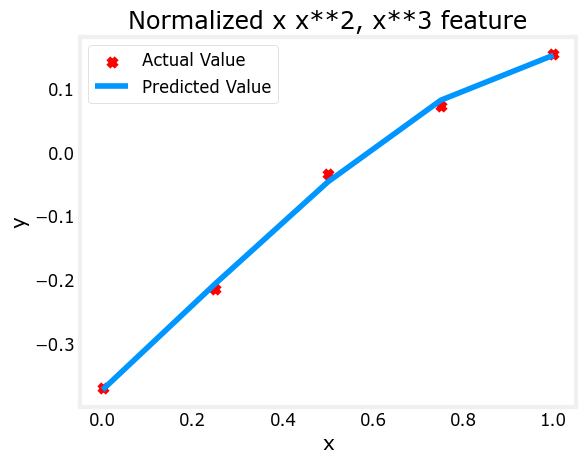

In [7]:
model_w, model_b = run_gradient_descent_rob(X, y, iterations=100000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Iteration         0, Cost: 1.03953e-02
Iteration    100000, Cost: 7.14663e-15
Iteration    200000, Cost: 2.92004e-24
Iteration    300000, Cost: 1.21827e-29
Iteration    400000, Cost: 1.21827e-29
Iteration    500000, Cost: 1.21827e-29
Iteration    600000, Cost: 1.21827e-29
Iteration    700000, Cost: 1.21827e-29
Iteration    800000, Cost: 1.21827e-29
Iteration    900000, Cost: 1.21827e-29
w,b found by gradient descent: w: [ 0.18614408  0.15142279 -0.00626014 -0.08456492 -0.0983942  -0.08048126
 -0.05169748 -0.02226876  0.00369724  0.02507919  0.04204285  0.05521416
  0.0653088 ], b: -0.0784


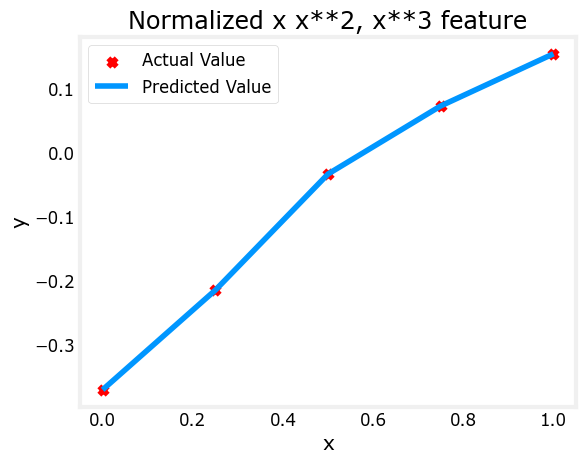

In [8]:
X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X) 

model_w,model_b = run_gradient_descent_rob(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()
